In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 10, 6

In [2]:
df = pd.read_csv('AirPassengers.csv')

In [3]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df['Month'] = pd.to_datetime(df['Month'], infer_datetime_format=True)
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [5]:
dfi = df.set_index(['Month'])

In [6]:
dfi.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


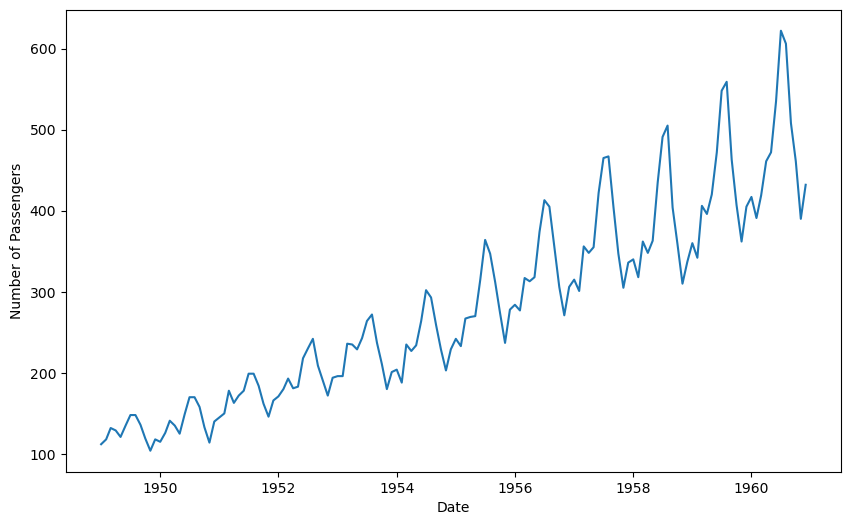

In [7]:
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.plot(dfi)

In [8]:
#to check stationarity we have two methods

In [9]:
#rolling statistics
rolmean = dfi.rolling(window=12).mean()

rolstd = dfi.rolling(window=12).std()
print(rolmean, rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


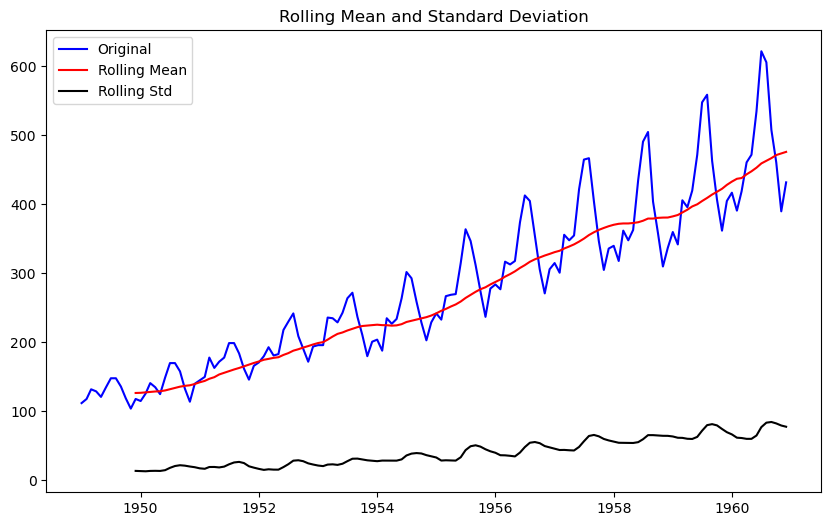

In [10]:
##plotting rolling statistics
orig = plt.plot(dfi, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show(block=False)

In [11]:
#there is another test known as dickey fuller test

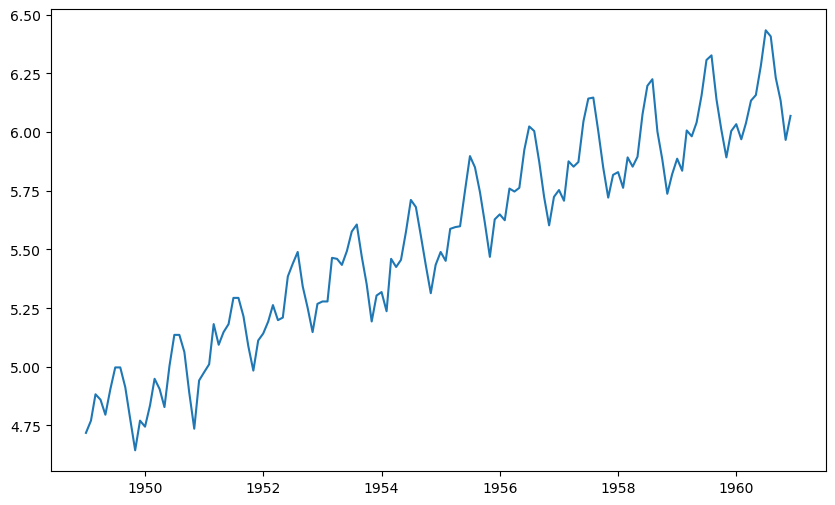

In [12]:
#Estimating trend
dfi_log = np.log(dfi)
plt.plot(dfi_log)

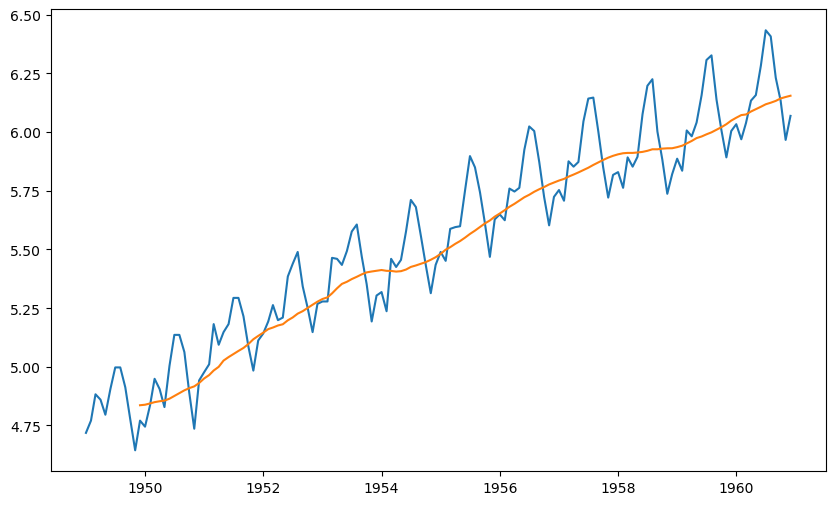

In [13]:
movingAverage = dfi_log.rolling(window=12).mean()
movingSTD = dfi_log.rolling(window=12).std()
plt.plot(dfi_log)
plt.plot(movingAverage)


In [14]:
movingAverage.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [15]:
dfi_log.head(12)

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
1949-06-01,4.905275
1949-07-01,4.997212
1949-08-01,4.997212
1949-09-01,4.912655


In [16]:
#Now we will make our data stationary by subtracting by subtracting Moving average from our log data but it is not standard way as sometimes we have to square or sometimes cube root of our data, it totally depends on our data

In [17]:
data_stationary = []

for i in range(len(dfi_log)):
    data_stationary.append(dfi_log['#Passengers'][i] - movingAverage['#Passengers'][i])

dfi_log['stationary'] = data_stationary

In [18]:
data_station = dfi_log[['stationary']]

In [19]:
data_station.head()

,stationary
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN


In [20]:
dfi_log = dfi_log.drop('stationary', axis=1)

In [21]:
dfi_log.head()

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791


In [22]:
data_station.rename(columns = {'stationary':'#Passengers'}, inplace=True)

In [24]:
data_station.head(30)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [25]:
data_station.dropna(inplace=True)

In [26]:
data_station.head()

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


In [27]:
#Now to check stationarity of data_station again by using those methods

In [30]:
def test_stationarity(timeseries):
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

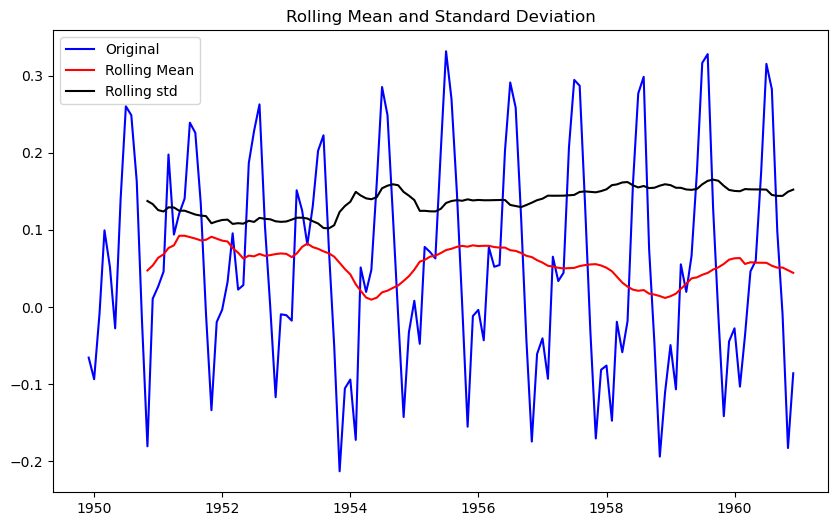

In [31]:
test_stationarity(data_station)

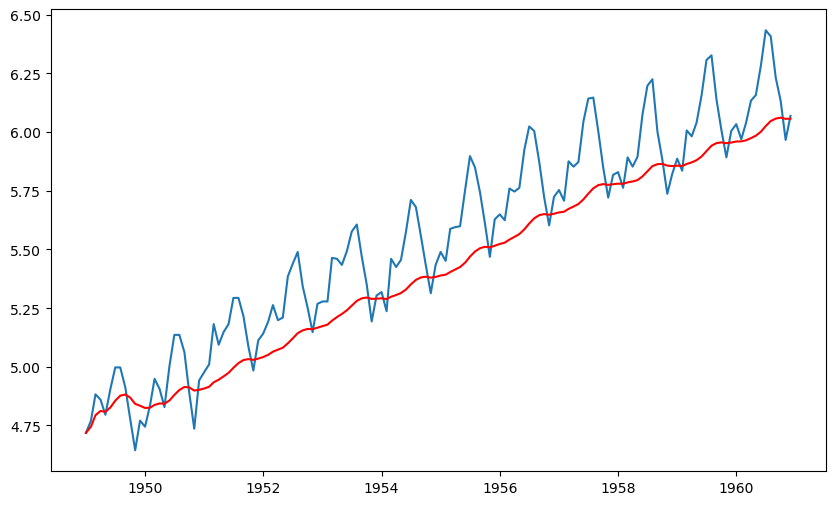

In [34]:
data_WeightedAverage = dfi_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(dfi_log)
plt.plot(data_WeightedAverage, color='red')

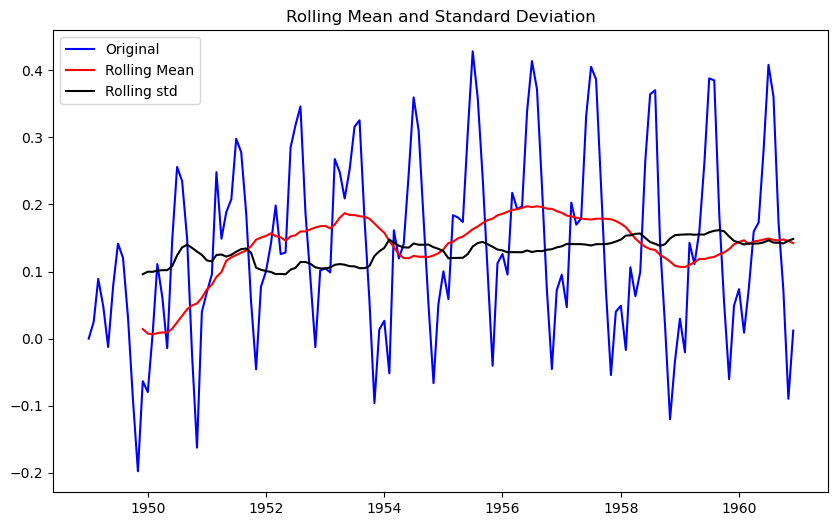

In [35]:
data_minus_weighted = dfi_log - data_WeightedAverage
test_stationarity(data_minus_weighted)

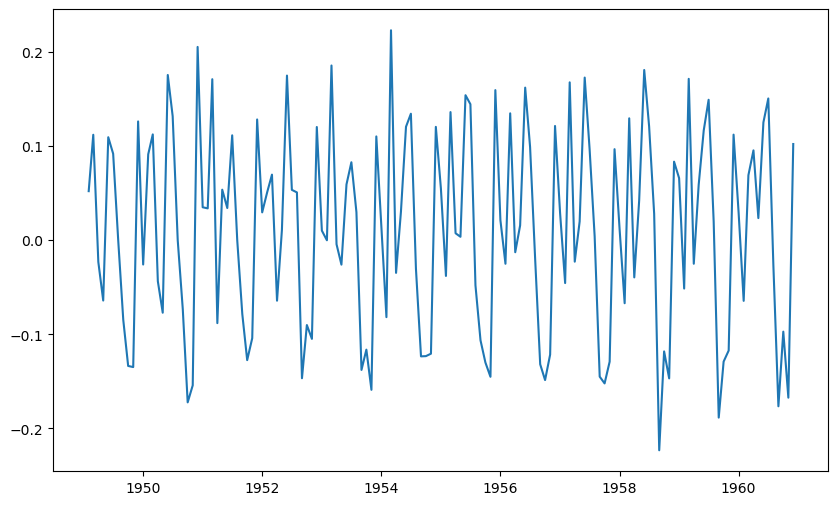

In [36]:
##we have shifted graph once that means we have differentiated it once so the value of d will be 1
data_shift = dfi_log - dfi_log.shift()
plt.plot(data_shift)

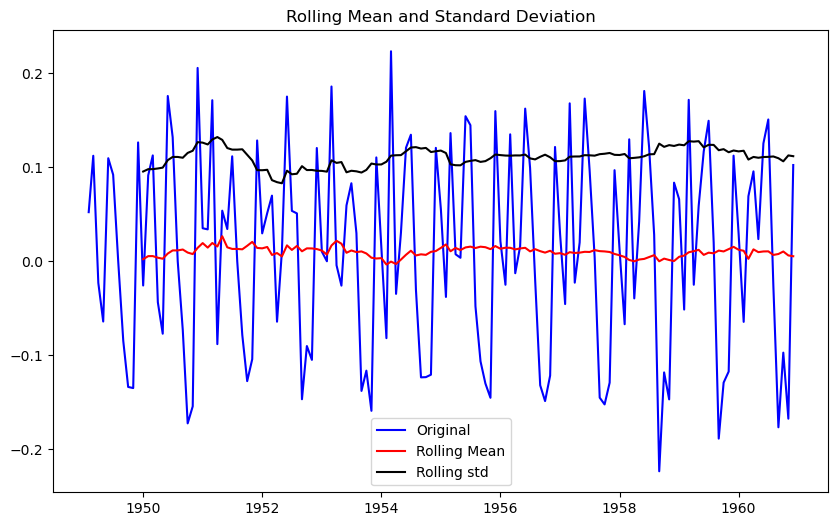

In [37]:
data_shift.dropna(inplace=True)
test_stationarity(data_shift)

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

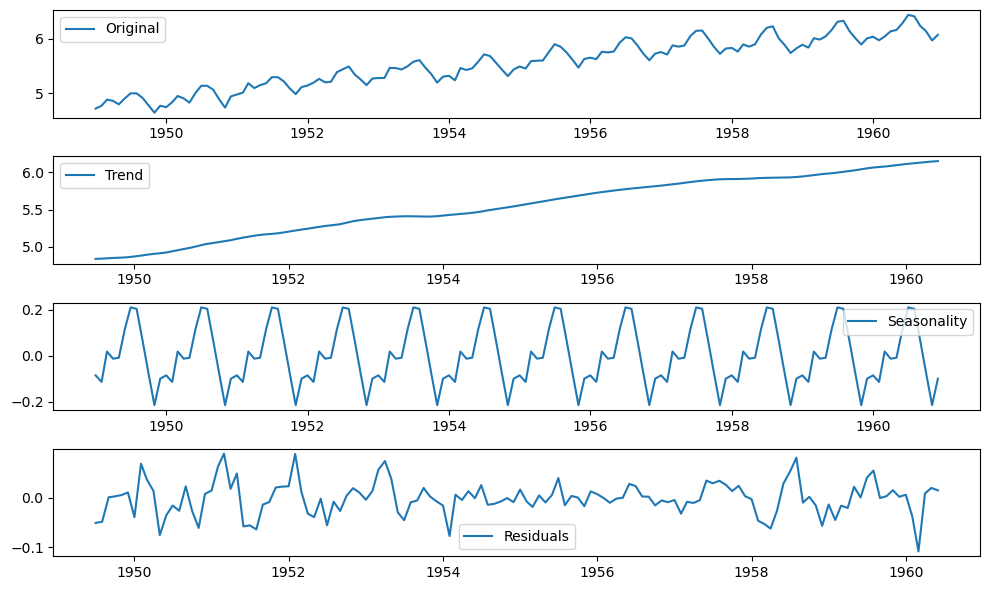

In [40]:
decomposition = seasonal_decompose(dfi_log)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(dfi_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

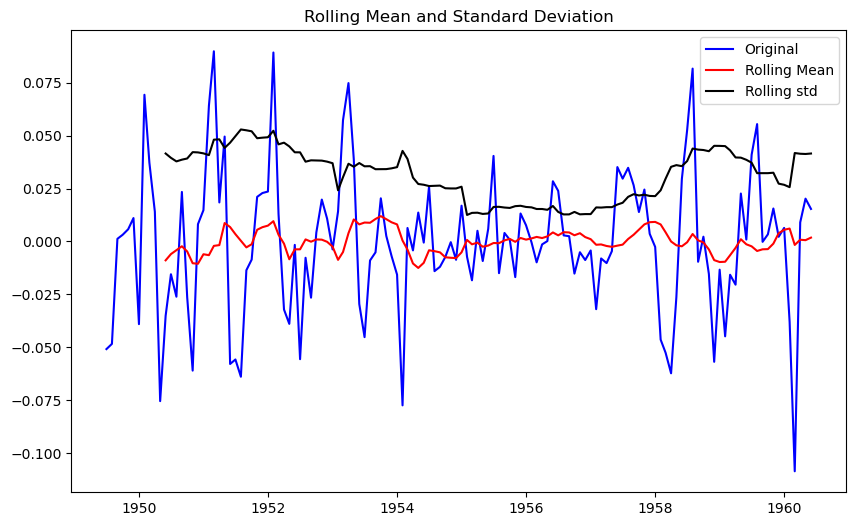

In [41]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

In [42]:
 ## for value of p we need to plot PACF graph and for the value of q we need to plot ACF graph

C:\Users\synda\AppData\Local\Temp\ipykernel_25956\2199065788.py:19: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


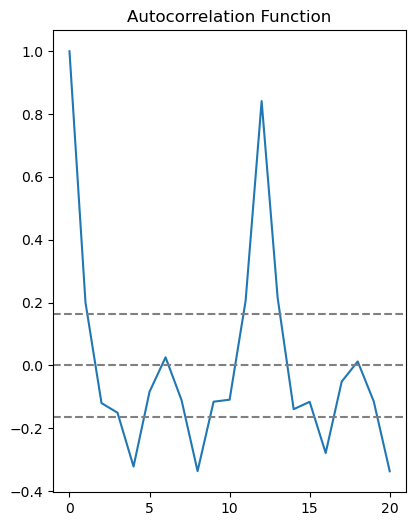

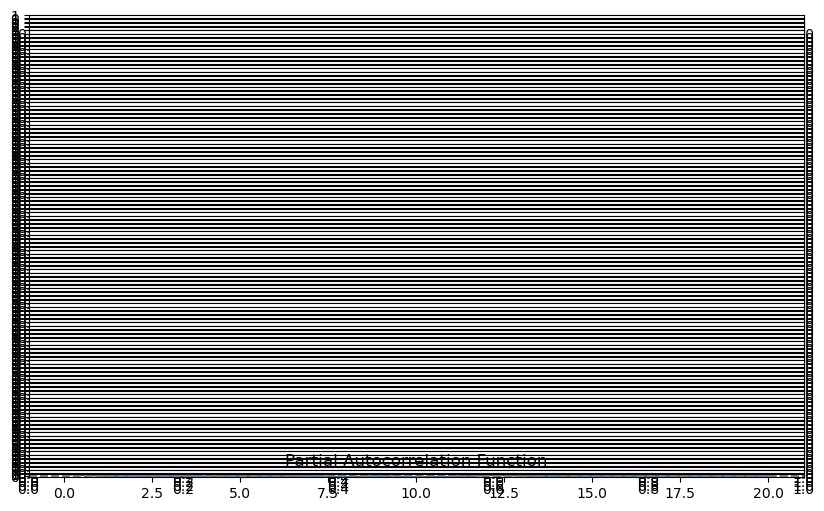

In [51]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(data_shift, nlags=20)
lag_pacf = pacf(data_shift, nlags=20, method='ols')

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)), linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_shift)), linestyle='--',color='gray')
plt.title('Autocorrelation Function')

plt.subplots(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)), linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_shift)), linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

#We check values of p and q by seeing where the graph touches 0 for the first time

C:\Users\synda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\synda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\synda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Plotting AR model


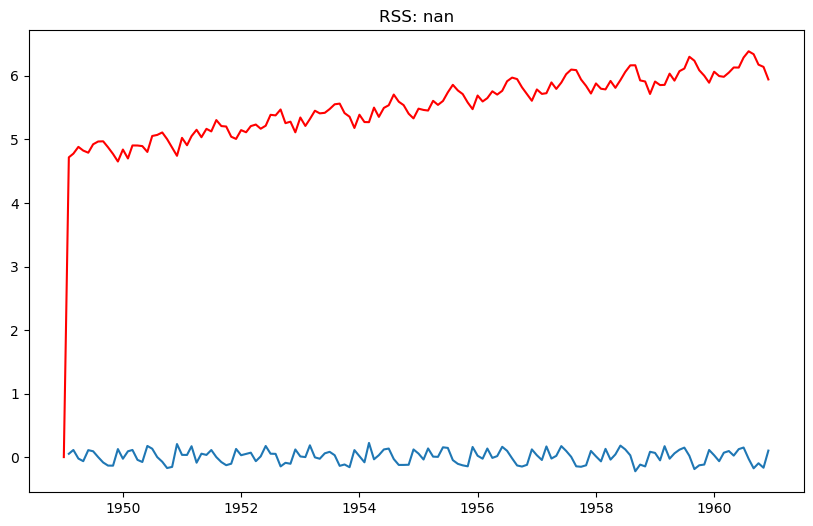

In [56]:
from statsmodels.tsa.arima.model import ARIMA

#AR model
model = ARIMA(dfi_log, order=(2,1,2)) #p,d,q
result_AR = model.fit()
plt.plot(data_shift)
plt.plot(result_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((result_AR.fittedvalues-data_shift['#Passengers'])**2)) ##RSS is Residual Sum of squares
print('Plotting AR model')

In [63]:
sum((result_AR.fittedvalues-data_shift['#Passengers'])**2)

nan